<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

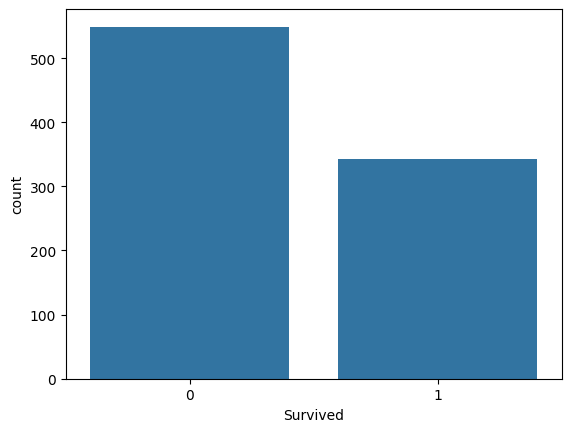

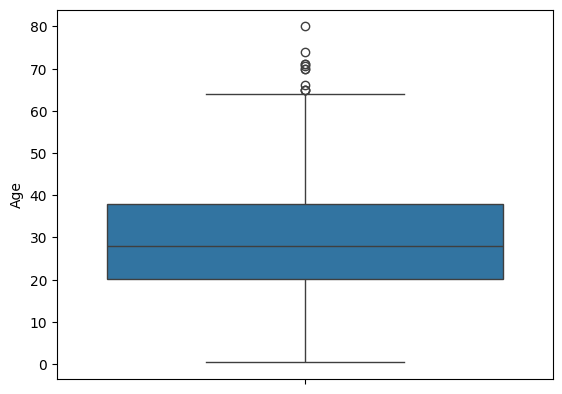

Intercept: 0.8256744245291958
Koefisien: [-0.08546228 -0.19051134 -0.04440117  0.04706011  0.03880555]
Mean Squared Error: 0.18715395657928005
R²: 0.22823681817802932
     Actual  Predicted
709       1   0.243549
439       0   0.419138
840       0   0.298958
720       1   0.648196
39        1   0.296609
..      ...        ...
433       0   0.318063
773       0   0.234623
25        1   0.389809
84        1   0.511212
10        1   0.413701

[179 rows x 2 columns]
Prediksi untuk data baru: 0.26554741916779456


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23432\3906143151.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = imputer.fit_transform(X[['Age']])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23432\3906143151.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
data = pd.read_csv('train.csv')

# EDA
print(data.info())
print(data.describe())
print(data.isnull().sum())

sns.countplot(data=data, x='Survived')
plt.show()

sns.boxplot(data['Age'])
plt.show()

# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# plt.show()

# Data Preprocessing
X = data[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

imputer = SimpleImputer(strategy='mean')
X['Age'] = imputer.fit_transform(X[['Age']])

scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling
model = LinearRegression()
model.fit(X_train, y_train)

print(f'Intercept: {model.intercept_}')
print(f'Koefisien: {model.coef_}')

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R²: {r2}')

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

new_data = pd.DataFrame({'Age': [25], 'Pclass': [3], 'SibSp': [0], 'Parch': [0], 'Fare': [7.25]})
new_data[['Age', 'Fare']] = scaler.transform(new_data[['Age', 'Fare']])
new_prediction = model.predict(new_data)

print(f"Prediksi untuk data baru: {new_prediction[0]}")
